In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [10]:
from turboflow.models.phyrff import plDivFreeRFFNet

path_to_best_model = '/home/dicarlo_d/Documents/Code/TurboSuperResultion/.torch_checkpoints/'
best_model_ckpt = 'Turb2D-MFN-1x32x32_gabor-epoch=429-val_loss=0.00.ckpt'
path_to_best_model = path_to_best_model + best_model_ckpt
model = plDivFreeRFFNet.load_from_checkpoint(path_to_best_model)
print(model)

plDivFreeRFFNet(
  (rff_time): Fourier()
  (rff_space): Fourier()
  (mfn): MFN(
    (filters): ModuleList(
      (0): GaborFilter(
        (linear): Linear(in_features=3, out_features=256, bias=True)
      )
      (1): GaborFilter(
        (linear): Linear(in_features=3, out_features=256, bias=True)
      )
      (2): GaborFilter(
        (linear): Linear(in_features=3, out_features=256, bias=True)
      )
      (3): GaborFilter(
        (linear): Linear(in_features=3, out_features=256, bias=True)
      )
      (4): GaborFilter(
        (linear): Linear(in_features=3, out_features=256, bias=True)
      )
    )
    (linear): ModuleList(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Linear(in_features=256, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): Linear(in_features=256, out_features=256, bias=True)
      (4): Linear(in_features=256, out_features=2, bias=True)
    )
  )
  (sp_grad): SpatialGradient

torch.Size([4096, 3])
tensor([[-0.1523,  0.2654],
        [-0.1437,  0.2891],
        [-0.1102,  0.2561],
        ...,
        [-0.0379,  0.0631],
        [-0.0570,  0.0643],
        [-0.0530,  0.0612]], grad_fn=<AddmmBackward>)


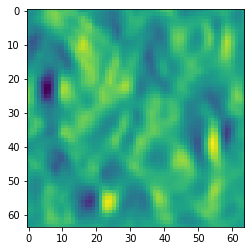

In [8]:
R = 64
t = torch.linspace(0, 1, 1)
x = torch.linspace(0, 1, R)
y = torch.linspace(0, 1, R)

X = torch.stack(torch.meshgrid(t, x, y))
X = torch.flatten(X, start_dim=1)
X = X.T
print(X.shape)
y = model(X)[0]

print(y)

plt.imshow(y.reshape(R,R,2)[:,:,0].detach().numpy())

In [38]:
for k in range(5):
    g0_w = model.mfn.filters[k].linear.weight.data
    g0_b = model.mfn.filters[k].linear.bias.data

    l0_w = model.mfn.linear[k].weight.data
    l0_b = model.mfn.linear[k].bias.data

    kx = g0_w[:,1]
    ky = g0_w[:,2]
    

    idx_x = torch.argsorrt(g0_w[:,1])
    idx_y = torch.argsorrt(g0_w[:,2])
    
    coeff_x = l0_w[:, idx]
    coeff_y = l0_w[:, idx]

    plt.plot(freqs, torch.sum(coeff[:10,:], dim=0)**2)
    
    plt.show()


tensor([-7.1609e+01,  5.2035e+01,  6.3365e+01, -1.6642e+01,  3.5509e+01,
        -8.9934e+01, -5.3154e+01, -2.4329e+01,  4.8620e+01, -1.1545e+01,
        -5.8100e-01,  5.6908e+00,  5.0099e+01, -4.5173e-02,  4.1503e+01,
         1.0651e+02, -5.0676e+01, -1.0528e+01, -1.0336e+01, -6.2545e+01,
         1.8800e+01, -2.5661e+01,  1.7269e+01,  1.6342e+01, -4.2064e+01,
         1.7516e+01, -7.0016e+01, -2.8402e+01, -2.4378e+00,  1.7634e+01,
         4.9692e+01, -2.2116e+01,  4.9826e+01, -4.9222e+01,  5.0551e+01,
        -9.4630e-01, -1.1031e+01,  9.8401e+00, -5.8295e+01, -4.4993e+01,
         1.0317e+02, -2.6764e+01, -4.5795e+00, -4.9029e+01, -7.0016e+01,
        -1.1197e+02, -1.7112e+01, -4.8949e+01, -2.4612e+01, -5.3066e+01,
        -5.6071e+01, -1.8192e+01,  1.8158e+01,  3.3766e+00, -3.7451e+01,
        -1.1129e+01, -4.8693e+01,  1.1947e+01, -1.2317e+01, -7.1719e+00,
        -3.1615e+01,  5.8490e+00,  3.0363e+01, -2.5707e+01, -2.0520e+01,
         8.7230e+00, -1.2890e+00,  5.8065e+01, -5.1

AttributeError: module 'torch' has no attribute 'argsorrt'